## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import pi,sin,cos,atan2,sqrt,radians

%matplotlib inline

# supress the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the dataset
yourcabs=pd.read_csv("/content/drive/MyDrive/Capstone Project -YOURCABS/YourCabs.csv")
yourcabs.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [ ]:
# peeking the data
yourcabs.shape

(43431, 18)

In [ ]:
# Verify the data
yourcabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [ ]:
# Statistical Summary of your data
yourcabs.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [ ]:
yourcabs.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [ ]:
yourcabs["travel_type_id"]=3

In [ ]:
yourcabs["travel_type_id"]

0        3
1        3
2        3
3        3
4        3
        ..
43426    3
43427    3
43428    3
43429    3
43430    3
Name: travel_type_id, Length: 43431, dtype: int64

In [ ]:
#check the class imbalance in the data.this is a common problem in classification problem
# this tells us the our data has class imblance
yourcabs["Car_Cancellation"].value_counts(normalize=True)


0    0.927886
1    0.072114
Name: Car_Cancellation, dtype: float64

# spliting yourcabs raw data into three models for 3 different values of travel type id for car cancellation


 MODEL 1 :- travel_type_id = 3

In [ ]:
yourcabs.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [ ]:
## split the data into training and validation set
# we would use sklearn's train_test_split functionality for the same
targets=yourcabs["Car_Cancellation"]
features=yourcabs[["package_id","travel_type_id","from_area_id","from_city_id","to_city_id","from_date","online_booking","mobile_site_booking","booking_created"]]

features_train,features_val,target_train,target_val=train_test_split(features,targets,test_size=0.2,random_state=42,stratify=targets)

In [ ]:
features_train.reset_index(drop=True,inplace=True)
features_val.reset_index(drop=True,inplace=True)
target_train.reset_index(drop=True,inplace=True)
target_val.reset_index(drop=True,inplace=True)

In [ ]:
# only features with travel_type_id = 3
features_train["travel_type_id"] = 3
features_val["travel_type_id"] = 3

In [ ]:
features_train.shape,features_val.shape

((34744, 9), (8687, 9))

In [ ]:
target_train.shape,target_val.shape

((34744,), (8687,))

In [ ]:
target_train.value_counts(normalize=True)

0    0.927872
1    0.072128
Name: Car_Cancellation, dtype: float64

In [ ]:
features_train.columns

Index(['package_id', 'travel_type_id', 'from_area_id', 'from_city_id',
       'to_city_id', 'from_date', 'online_booking', 'mobile_site_booking',
       'booking_created'],
      dtype='object')

# Data Cleaning

## Missing Value Treatment

In [ ]:
 # aggregate the null count
features_train.isnull().sum()

package_id             28642
travel_type_id             0
from_area_id              69
from_city_id           21707
to_city_id             33480
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
dtype: int64

In [ ]:

features_train.isnull().sum()*100/ features_train.shape[0]

package_id             82.437255
travel_type_id          0.000000
from_area_id            0.198595
from_city_id           62.476974
to_city_id             96.361962
from_date               0.000000
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
dtype: float64

# DROPING COLUMN >= 10% MISSING VALUES / NAN VALUES

In [ ]:
# droping colm
features_train.drop(["from_city_id","to_city_id","package_id"],axis=1,inplace=True)
features_val.drop(["from_city_id","to_city_id","package_id"],axis=1,inplace=True)


In [ ]:
features_train['from_area_id'].value_counts()

393.0     3106
571.0     1322
293.0      832
585.0      731
1010.0     609
          ... 
1235.0       1
1113.0       1
235.0        1
72.0         1
369.0        1
Name: from_area_id, Length: 590, dtype: int64

In [ ]:
features_train

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created
0,3,571.0,4/27/2013 19:00,1,0,4/26/2013 21:28
1,3,1056.0,10/19/2013 5:00,0,0,10/18/2013 19:11
2,3,1054.0,06-03-2013 14:45,1,0,06-03-2013 12:58
3,3,264.0,2/15/2013 9:00,0,0,2/14/2013 15:18
4,3,339.0,1/20/2013 8:00,0,0,1/19/2013 16:14
...,...,...,...,...,...,...
34739,3,1384.0,7/23/2013 13:00,1,0,7/23/2013 9:08
34740,3,1320.0,05-01-2013 15:30,1,0,05-01-2013 10:25
34741,3,61.0,7/15/2013 23:30,1,0,7/15/2013 19:22
34742,3,142.0,10-04-2013 19:00,1,0,10-04-2013 16:13


In [ ]:
# checking the null values
features_train.isnull()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
34739,False,False,False,False,False,False
34740,False,False,False,False,False,False
34741,False,False,False,False,False,False
34742,False,False,False,False,False,False


In [ ]:
# checking for unique values
features_train["travel_type_id"].nunique()

1

In [ ]:
# filling nan values with mean
features_train["from_area_id"]=features_train["from_area_id"].fillna(features_train["from_area_id"].mean())
features_val["from_area_id"]=features_val["from_area_id"].fillna(features_val["from_area_id"].mean())

In [ ]:
# checking for unique values
features_train["online_booking"].nunique()

2

In [ ]:
# checking for total null values
features_train["from_area_id"].isnull().sum()

0

In [ ]:
# spliting date , time col and making single colume hours
features_train["from_date"]=pd.to_datetime(features_train["from_date"])
features_train["from_date"]=features_train["from_date"].dt.hour
features_train["booking_created"]=pd.to_datetime(features_train["booking_created"])
features_train["booking_created"]=features_train["booking_created"].dt.hour
features_train["date_time"]=features_train["from_date"]-features_train["booking_created"]/24

In [ ]:
# spliting date , time col and making single colume hours
features_val["from_date"]=pd.to_datetime(features_val["from_date"])
features_val["from_date"]=features_val["from_date"].dt.hour
features_val["booking_created"]=pd.to_datetime(features_val["booking_created"])
features_val["booking_created"]=features_val["booking_created"].dt.hour
features_val["date_time"]=features_val["from_date"]-features_val["booking_created"]/24

In [ ]:
features_train["date_time"]

0        18.125000
1         4.208333
2        13.500000
3         8.375000
4         7.333333
           ...    
34739    12.625000
34740    14.583333
34741    22.208333
34742    18.333333
34743     8.583333
Name: date_time, Length: 34744, dtype: float64

In [ ]:
features_train

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,date_time
0,3,571.0,19,1,0,21,18.125000
1,3,1056.0,5,0,0,19,4.208333
2,3,1054.0,14,1,0,12,13.500000
3,3,264.0,9,0,0,15,8.375000
4,3,339.0,8,0,0,16,7.333333
...,...,...,...,...,...,...,...
34739,3,1384.0,13,1,0,9,12.625000
34740,3,1320.0,15,1,0,10,14.583333
34741,3,61.0,23,1,0,19,22.208333
34742,3,142.0,19,1,0,16,18.333333


In [ ]:
# droping col
features_train.drop(["from_date","booking_created"],axis=1,inplace=True)
features_val.drop(["from_date","booking_created"],axis=1,inplace=True)


In [ ]:
# for describe the data statisticaly
features_train.describe()

,travel_type_id,from_area_id,online_booking,mobile_site_booking,date_time
count,34744.0,34744.000000,34744.000000,34744.000000,34744.000000
mean,3.0,713.146849,0.353097,0.043058,11.428231
std,0.0,419.212512,0.477939,0.202990,6.087033
min,3.0,2.000000,0.000000,0.000000,-0.958333
25%,3.0,393.000000,0.000000,0.000000,6.416667
50%,3.0,590.000000,0.000000,0.000000,10.666667
75%,3.0,1089.000000,1.000000,0.000000,16.583333
max,3.0,1403.000000,1.000000,1.000000,23.000000


In [ ]:
# no of col
features_train.columns

Index(['travel_type_id', 'from_area_id', 'online_booking',
       'mobile_site_booking', 'date_time'],
      dtype='object')

# Outlier Treatment

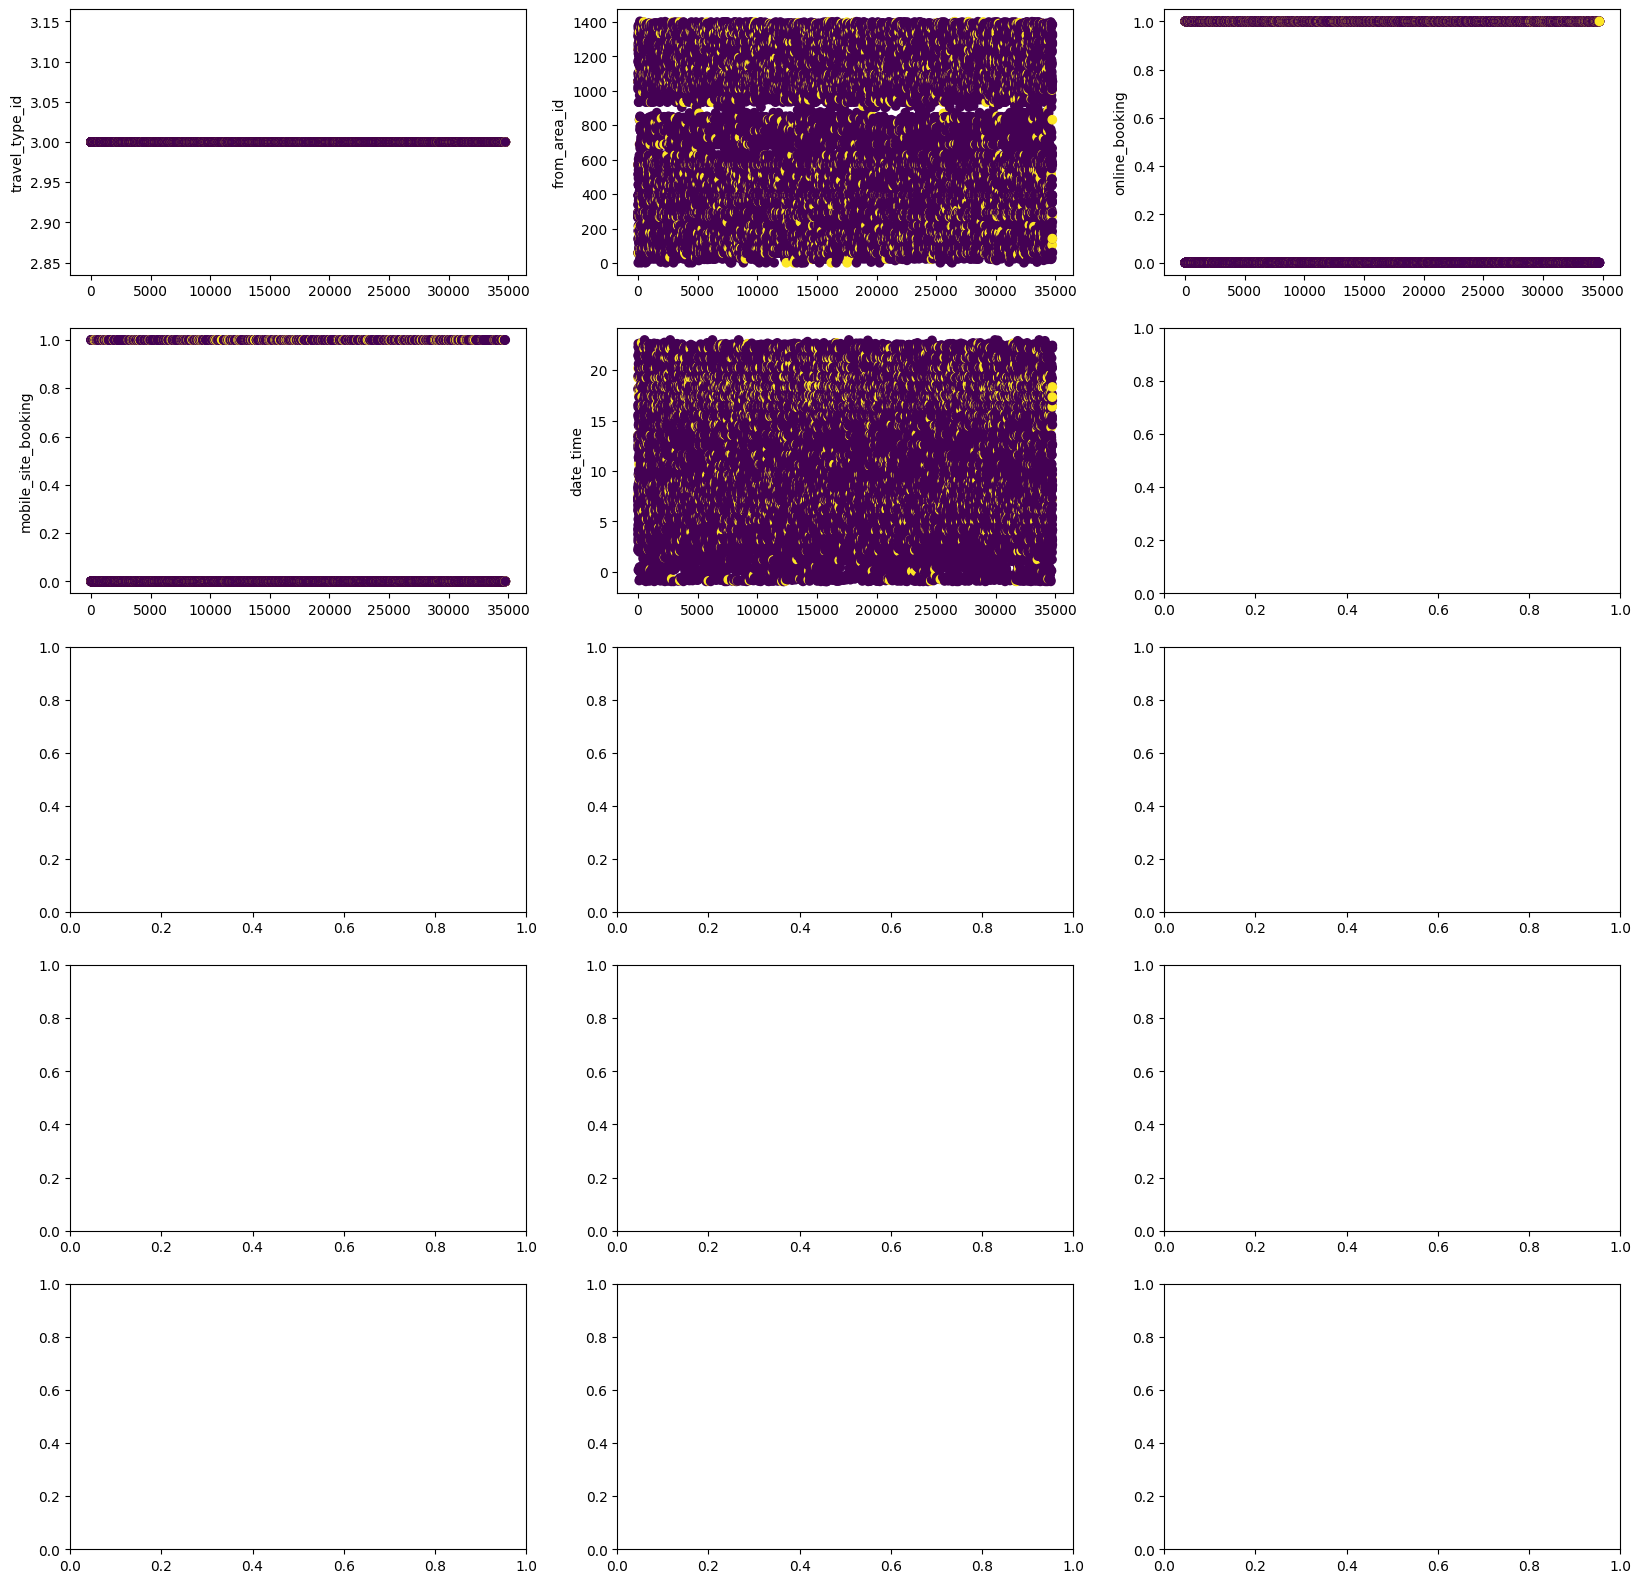

In [ ]:
# visualization of data
numeric_cols=features_train.select_dtypes(include = np.number) ### selects numeric columns
column_names=list(numeric_cols.columns)
col_index=0
plot_rows=5
plot_cols=3

fig, ax =plt.subplots(nrows=plot_rows,ncols=plot_cols,figsize=(20,20))

for row_count in range(plot_rows):
  for col_count in range(plot_cols):
    if col_index < len(column_names):
      ax[row_count][col_count].scatter(y=numeric_cols[column_names[col_index]],x=numeric_cols.index,c=target_train)
      ax[row_count][col_count].set_ylabel(column_names[col_index])
      col_index=col_index + 1
    else:

      break

plt.show()

<Axes: >

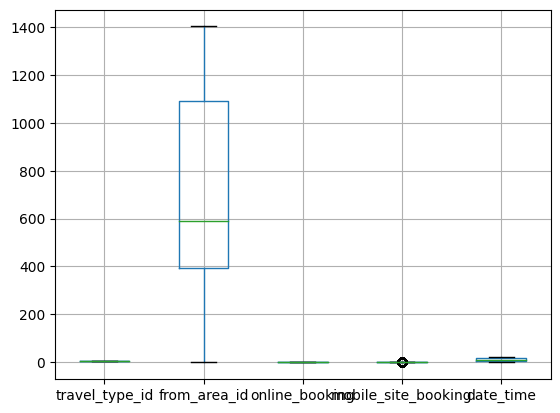

In [ ]:
# visualization of data using boxplot
features_train.boxplot()

dataset doesnt has outliers

In [ ]:
features_train

,travel_type_id,from_area_id,online_booking,mobile_site_booking,date_time
0,3,571.0,1,0,18.125000
1,3,1056.0,0,0,4.208333
2,3,1054.0,1,0,13.500000
3,3,264.0,0,0,8.375000
4,3,339.0,0,0,7.333333
...,...,...,...,...,...
34739,3,1384.0,1,0,12.625000
34740,3,1320.0,1,0,14.583333
34741,3,61.0,1,0,22.208333
34742,3,142.0,1,0,18.333333


In [ ]:
features_train.isnull().sum()

travel_type_id         0
from_area_id           0
online_booking         0
mobile_site_booking    0
date_time              0
dtype: int64

# Statistical Summary of your data

In [ ]:
# Statistical Summary of your data
features_train.describe()

,travel_type_id,from_area_id,online_booking,mobile_site_booking,date_time
count,34744.0,34744.000000,34744.000000,34744.000000,34744.000000
mean,3.0,713.146849,0.353097,0.043058,11.428231
std,0.0,419.212512,0.477939,0.202990,6.087033
min,3.0,2.000000,0.000000,0.000000,-0.958333
25%,3.0,393.000000,0.000000,0.000000,6.416667
50%,3.0,590.000000,0.000000,0.000000,10.666667
75%,3.0,1089.000000,1.000000,0.000000,16.583333
max,3.0,1403.000000,1.000000,1.000000,23.000000


# Correlation Analysis

In [ ]:
# visualization of data using sns heatmap
sns.heatmap(features_train.corr(),annot=True,cmap="RdYlGn")

# Data Scaling

In [ ]:
#  scaling
standard_scaler=StandardScaler()
features_train=standard_scaler.fit_transform(features_train)
features_val=standard_scaler.transform(features_val)

In [ ]:
target_train.isnull().sum()

0

# LogisticRegression

In [ ]:
# instantiating and fitting the model to training data

log_reg=LogisticRegression()
log_reg.fit(features_train,target_train)

LogisticRegression()

In [ ]:
#prediction for test data set
features_pred=log_reg.predict(features_val)
features_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
target_val=np.array(target_val)
target_val

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# accuracy
print("accuracy :",metrics.accuracy_score(target_val,features_pred))


accuracy : 0.9279382986071141


# classification_report

In [ ]:
# classification_report
print(classification_report(target_val,features_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.00      0.00      0.00       626

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687



# KNeighborsClassifier

In [ ]:
# knn implementation
knn=KNeighborsClassifier(n_neighbors=20,weights="distance",leaf_size=20,p=5,n_jobs=-1)
knn.fit(features_train,target_train)
#prediction for test data set
features_pred=knn.predict(features_val)
features_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy
print("accuracy :",metrics.accuracy_score(target_val,features_pred))


accuracy : 0.9199953954184413


In [ ]:
# classification_report
print(classification_report(target_val,features_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8061
           1       0.35      0.13      0.19       626

    accuracy                           0.92      8687
   macro avg       0.64      0.55      0.57      8687
weighted avg       0.89      0.92      0.90      8687



# confusion_matrix

In [ ]:
# confusion_matrix
conf_matrix=confusion_matrix(target_val,features_pred)
print(conf_matrix)

[[7912  149]
 [ 546   80]]


# DecisionTreeClassifier

In [ ]:
# DecisionTreeClassifier
dt=tree.DecisionTreeClassifier(random_state=42,max_depth=26,criterion="entropy",min_samples_split=8,min_samples_leaf=3)
dt.fit(features_train,target_train)
#prediction for test data set
features_pred=dt.predict(features_val)
features_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy
print("accuracy :",metrics.accuracy_score(target_val,features_pred))

accuracy : 0.9160815010935881


# confusion_matrix

In [ ]:
## confusion_matrix
conf_matrix=confusion_matrix(target_val,features_pred)
print(conf_matrix)

[[7859  202]
 [ 527   99]]


In [ ]:
# classification_report
print(classification_report(target_val,features_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8061
           1       0.33      0.16      0.21       626

    accuracy                           0.92      8687
   macro avg       0.63      0.57      0.58      8687
weighted avg       0.89      0.92      0.90      8687



# KNeighborsClassifier

In [ ]:
## knn
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(features_train,target_train)
pred = knn.predict(features_val)

print('WITH K=3')
print('\n')
print(confusion_matrix(target_val,features_pred))
print('\n')
print(classification_report(target_val,features_pred))

WITH K=3


[[7859  202]
 [ 527   99]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8061
           1       0.33      0.16      0.21       626

    accuracy                           0.92      8687
   macro avg       0.63      0.57      0.58      8687
weighted avg       0.89      0.92      0.90      8687



In [ ]:
## knn n_n=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(features_train,target_train)
pred = knn.predict(features_val)

print('WITH K=20')
print('\n')
print(confusion_matrix(target_val,features_pred))
print('\n')
print(classification_report(target_val,features_pred))

WITH K=20


[[7859  202]
 [ 527   99]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8061
           1       0.33      0.16      0.21       626

    accuracy                           0.92      8687
   macro avg       0.63      0.57      0.58      8687
weighted avg       0.89      0.92      0.90      8687



# SVM

In [ ]:
### SVC
svc=SVC(kernel="linear")
svc.fit(features_train,target_train)
features_pred=svc.predict(features_val)
print("accuracy score:")
print(metrics.accuracy_score(target_val,features_pred))

accuracy score:
0.9279382986071141


In [ ]:
# classification_report
print(classification_report(target_val,features_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.00      0.00      0.00       626

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687



In [ ]:
## SVC
svc=SVC(kernel="sigmoid",gamma="auto",C=2.2)
svc.fit(features_train,target_train)
features_pred=svc.predict(features_val)
print("accuracy score:")
print(metrics.accuracy_score(target_val,features_pred))

accuracy score:
0.8756762979164269


In [ ]:
# classification_report

print(classification_report(target_val,features_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8061
           1       0.11      0.11      0.11       626

    accuracy                           0.88      8687
   macro avg       0.52      0.52      0.52      8687
weighted avg       0.87      0.88      0.87      8687



# RandomForestClassifier

In [ ]:
## RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=42,max_depth=6,max_features="sqrt",criterion="entropy")
rf.fit(features_train,target_train)
features_pred=rf.predict(features_val)
print("accuracy score:")
print(metrics.accuracy_score(target_val,features_pred))

accuracy score:
0.9279382986071141


In [ ]:
# classification_report
print(classification_report(target_val,features_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.00      0.00      0.00       626

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687



In [ ]:
## RandomForestClassifier #
rf=RandomForestClassifier(n_estimators=500,random_state=42,max_depth=8,max_features="log2",criterion="entropy")
rf.fit(features_train,target_train)
features_pred=rf.predict(features_val)
print("accuracy score:")
print(metrics.accuracy_score(target_val,features_pred))

accuracy score:
0.9282836422240129


In [ ]:
# classification_report

print(classification_report(target_val,features_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.80      0.01      0.01       626

    accuracy                           0.93      8687
   macro avg       0.86      0.50      0.49      8687
weighted avg       0.92      0.93      0.89      8687



## HyperParameter tuning
#### GridSearchCV of sklearn helps us in performing hyperparameter tuning

# GridSearchCV FOR DecisionTreeClassifier

In [ ]:
#GridSearchCV
dt_gv=DecisionTreeClassifier()
params_grid={
    "random_state":[42],
    "max_depth":[5,6,7],
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "min_samples_leaf":[2,4,5,6],
    "min_samples_split":[3,4,5,6,7],
    "max_features":["sqrt",0.5,0.8,0.9],
    "class_weight":[{0:1.2,1:3},{0:1.3,1:3.5},{0:1.2,1:4.5},{0:1.2,1:5},{0:0.9,1:4.5},{0:1,1:5.5}]
}

grid_search_cv=GridSearchCV(
    estimator=dt_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

#GridSearchCV FOR LogisticRegression

In [ ]:
#GridSearchCV

lr_gv=LogisticRegression()
params_grid={
    "max_iter":[500,1000],
    "solver":["newton-cholesky","newton-cg"],
    "C":[1.3,1.4,1.5],
    "n_jobs":[-1],
    "class_weight":[{0:1.2,1:3},{0:1.3,1:3.5},{0:1.2,1:4.5},{0:1.2,1:5}]
}

grid_search_cv=GridSearchCV(
    estimator=lr_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

# GridSearchCV FOR KNeighborsClassifier

In [ ]:
#GridSearchCV

knn_gv=KNeighborsClassifier()
params_grid={
    "n_neighbors":[20,21,23],
    "weights":["distance"],
    "leaf_size":[20,30,40],
    "n_jobs":[-1],
    "p":[5,6,7]
}

grid_search_cv=GridSearchCV(
    estimator=knn_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

# GridSearchCV FOR RandomForestClassifier

In [ ]:
# GridSearchCV

rf=RandomForestClassifier()

params_grid={
    "n_estimators":[500],
    "max_depth":[8,11,13,None],
    "min_samples_split":[50,70,100],
    "max_features":["sqrt",0.5],
    "n_jobs":[-1],
    "class_weight":[{0:1,1:3},{0:1,1:4},{0:0.9,1:3.5},{0:1.2,1:4.2}]
}

grid_search_cv = GridSearchCV(
    estimator=rf,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train,target_train)

In [ ]:
results_df=pd.DataFrame({
    "Parameters":grid_search_cv.cv_results_["params"],
    "MeanTrainScore":grid_search_cv.cv_results_["mean_train_score"],
    "MeanTestScore":grid_search_cv.cv_results_["mean_test_score"]})

In [ ]:
results_df.to_csv("GridSearchPerformannce_rf.csv",index=None)

In [ ]:
# BEST KNN
#{'leaf_size': 20, 'n_jobs': -1, 'n_neighbors': 5, 'p': 7, 'weights': 'distance'}
#MeanTrainScore:-0.854157356756882
#MeanTestScore:-0.1958418194211

# BEST DecisionTreeClassifier

In [ ]:
bestdt=DecisionTreeClassifier(class_weight={0:1.2,1:4.5},
                              max_depth=14,
                              criterion="entropy",
                              random_state=42,
                              min_samples_split=6,
                              min_samples_leaf=6,
                              max_features=0.9)
bestdt.fit(features_train,target_train)

DecisionTreeClassifier(class_weight={0: 1.2, 1: 4.5}, criterion='entropy',
                       max_depth=14, max_features=0.9, min_samples_leaf=6,
                       min_samples_split=6, random_state=42)

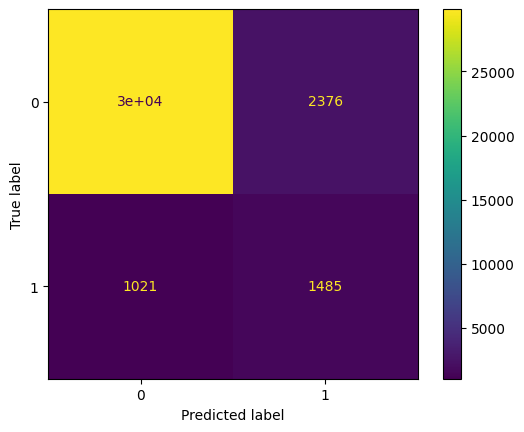

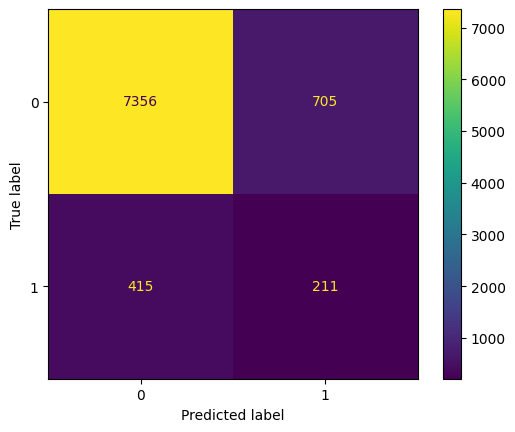

In [ ]:

tr_pred = bestdt.predict(features_train)
val_pred = bestdt.predict(features_val)
ConfusionMatrixDisplay.from_predictions(target_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(target_val,val_pred)

In [ ]:
train_f1 = f1_score(target_train,tr_pred)
val_f1 = f1_score(target_val,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.4664677242029213
val F1 Score - 0.2736705577172503


# second model :- travel_type_id = 1

In [ ]:
yourcabs.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [ ]:
## split the data into training and validation set
targets1=yourcabs["Car_Cancellation"]
features1=yourcabs[["travel_type_id","from_area_id","from_city_id","to_city_id","online_booking","mobile_site_booking"]]

features_train1,features_val1,target_train1,target_val1=train_test_split(features1,targets1,test_size=0.2,random_state=42,stratify=targets1)

In [ ]:
features_train1.reset_index(drop=True,inplace=True)
features_val1.reset_index(drop=True,inplace=True)
target_train1.reset_index(drop=True,inplace=True)
target_val1.reset_index(drop=True,inplace=True)

In [ ]:
features_train1.shape

(34744, 6)

In [ ]:
features_val1.shape

(8687, 6)

In [ ]:
target_train1.value_counts()

0    32238
1     2506
Name: Car_Cancellation, dtype: int64

In [ ]:
features_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34744 entries, 0 to 34743
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       34744 non-null  int64  
 1   from_area_id         34675 non-null  float64
 2   from_city_id         13037 non-null  float64
 3   to_city_id           1264 non-null   float64
 4   online_booking       34744 non-null  int64  
 5   mobile_site_booking  34744 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


In [ ]:
# features with travel_type_id = 1

features_train1["travel_type_id"]=1

features_val1["travel_type_id"]=1

In [ ]:
features_train1.isnull().sum()* 100/features_train1.shape[0]

travel_type_id          0.000000
from_area_id            0.198595
from_city_id           62.476974
to_city_id             96.361962
online_booking          0.000000
mobile_site_booking     0.000000
dtype: float64

# DROPING COLUMN >= 10% MISSING VALUES / NAN VALUES

In [ ]:
# drop
features_train1.drop(["from_city_id","to_city_id"],axis=1,inplace=True)
features_val1.drop(["from_city_id","to_city_id"],axis=1,inplace=True)

In [ ]:
features_train1.describe()

,travel_type_id,from_area_id,online_booking,mobile_site_booking
count,34744.0,34675.000000,34744.000000,34744.000000
mean,1.0,713.146849,0.353097,0.043058
std,0.0,419.629413,0.477939,0.202990
min,1.0,2.000000,0.000000,0.000000
25%,1.0,393.000000,0.000000,0.000000
50%,1.0,590.000000,0.000000,0.000000
75%,1.0,1089.000000,1.000000,0.000000
max,1.0,1403.000000,1.000000,1.000000


In [ ]:
features_train1["travel_type_id"]=1

In [ ]:
features_train1

,travel_type_id,from_area_id,online_booking,mobile_site_booking
0,1,571.0,1,0
1,1,1056.0,0,0
2,1,1054.0,1,0
3,1,264.0,0,0
4,1,339.0,0,0
...,...,...,...,...
34739,1,1384.0,1,0
34740,1,1320.0,1,0
34741,1,61.0,1,0
34742,1,142.0,1,0


In [ ]:
features_train1["from_area_id"].fillna(features_train1["from_area_id"].mean(),inplace=True)
features_val1["from_area_id"].fillna(features_train1["from_area_id"].mean(),inplace=True)

In [ ]:
features_train1.isnull().sum()

travel_type_id         0
from_area_id           0
online_booking         0
mobile_site_booking    0
dtype: int64

<Axes: >

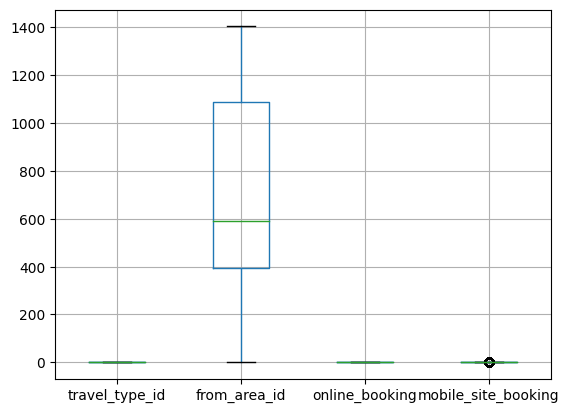

In [ ]:
# visualization of data using boxplot
features_train1.boxplot()

<Axes: >

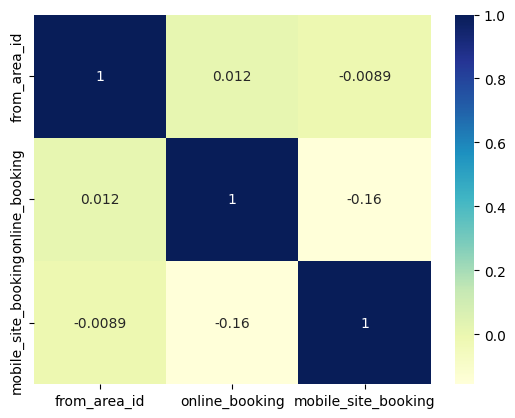

In [ ]:
# visualization of data using sns heatmap
sns.heatmap(features_train1[['from_area_id','online_booking','mobile_site_booking']].corr(),cmap="YlGnBu",annot=True)

from sklearn.preprocessing import MinMaxScaler
min_sc=MinMaxScaler()
features_train1=min_sc.fit_transform(features_train1)
features_val1=min_sc.transform(features_val1)

In [ ]:
features_train1

,travel_type_id,from_area_id,online_booking,mobile_site_booking
0,1,571.0,1,0
1,1,1056.0,0,0
2,1,1054.0,1,0
3,1,264.0,0,0
4,1,339.0,0,0
...,...,...,...,...
34739,1,1384.0,1,0
34740,1,1320.0,1,0
34741,1,61.0,1,0
34742,1,142.0,1,0


In [ ]:
# feature  scaling
standard_scaler=StandardScaler()
features_train1=standard_scaler.fit_transform(features_train1)
features_val1=standard_scaler.transform(features_val1)

In [ ]:
## LogisticRegression
lr=LogisticRegression(max_iter=500,random_state=42,class_weight={0:1,1:4.5})
lr.fit(features_train1,target_train1)
#prediction for test data set
features_pred1=lr.predict(features_val1)
features_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy

print("accuracy :",metrics.accuracy_score(target_val1,features_pred1))


accuracy : 0.9279382986071141


In [ ]:
# classification_report
print(classification_report(target_val1,features_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.00      0.00      0.00       626

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687



In [ ]:
#knn- KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights="distance",leaf_size=20,p=3,n_jobs=-1)
knn.fit(features_train1,target_train1)
#prediction for test data set
features_pred1=knn.predict(features_val1)
features_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy

print("accuracy :",metrics.accuracy_score(target_val1,features_pred1))

accuracy : 0.9225279152756993


In [ ]:
# classification_report
print(classification_report(target_val1,features_pred1))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8061
           1       0.26      0.04      0.07       626

    accuracy                           0.92      8687
   macro avg       0.60      0.52      0.52      8687
weighted avg       0.88      0.92      0.90      8687



In [ ]:
## DecisionTreeClassifier
dt=tree.DecisionTreeClassifier(random_state=42,max_depth=5,criterion="entropy",min_samples_split=4,min_samples_leaf=2)
dt.fit(features_train1,target_train1)
#prediction for test data set
features_pred1=dt.predict(features_val1)
features_pred1


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy
print("accuracy :",metrics.accuracy_score(target_val1,features_pred1))

accuracy : 0.9281685276850467


In [ ]:
# classification_report
print(classification_report(target_val1,features_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.75      0.00      0.01       626

    accuracy                           0.93      8687
   macro avg       0.84      0.50      0.49      8687
weighted avg       0.92      0.93      0.89      8687



In [ ]:
# Randomforestclassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=8,max_features="sqrt")
rf.fit(features_train1,target_train1)
features_pred1=rf.predict(features_val1)
print("accuracy score:")
print(metrics.accuracy_score(target_val1,features_pred1))

accuracy score:
0.9277080695291815


In [ ]:
# classification_report
print(classification_report(target_val1,features_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.25      0.00      0.00       626

    accuracy                           0.93      8687
   macro avg       0.59      0.50      0.48      8687
weighted avg       0.88      0.93      0.89      8687



In [ ]:
## SVC
svc=SVC()
svc.fit(features_train1,target_train1)
features_pred1=svc.predict(features_val1)
print("accuracy score:")
print(metrics.accuracy_score(target_val1,features_pred1))

accuracy score:
0.9279382986071141


In [ ]:
# classification_report
print(classification_report(target_val1,features_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.00      0.00      0.00       626

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687



 # GridSearchCV FOR DecisionTreeClassifier

In [ ]:
#GridSearchCV

dt_gv=DecisionTreeClassifier()
params_grid={
    "random_state":[42],
    "max_depth":[5,6,7],
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "min_samples_leaf":[2,4,5,6],
    "min_samples_split":[3,4,5,6,7],
    "max_features":["sqrt",0.5,0.8,0.9],
    "class_weight":[{0:1.2,1:3},{0:1.3,1:3.5},{0:1.2,1:4.5},{0:1.2,1:5},{0:0.9,1:4.5},{0:1,1:5.5}]
}

grid_search_cv=GridSearchCV(
    estimator=dt_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train1,target_train1)

In [ ]:
results_df=pd.DataFrame({
    "Parameters":grid_search_cv.cv_results_["params"],
    "MeanTrainScore":grid_search_cv.cv_results_["mean_train_score"],
    "MeanTestScore":grid_search_cv.cv_results_["mean_test_score"]})

In [ ]:
results_df.to_csv("GridSearchPerformanncedtf1.csv",index=None)

# GridSearchCV FOR LogisticRegression

In [ ]:
#GridSearchCV

lr_gv=LogisticRegression()
params_grid={
    "max_iter":[100,500],
    "solver":["liblinear","newton-cholesky","newton-cg"],
    "C":[1.3,1.4,1.5],
    "n_jobs":[-1],
    "class_weight":[None,{0:1.2,1:3},{0:1.3,1:3.5},{0:1.2,1:4.5},{0:1.2,1:5}]
}

grid_search_cv=GridSearchCV(
    estimator=lr_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train1,target_train1)

In [ ]:
results_df=pd.DataFrame({
    "Parameters":grid_search_cv.cv_results_["params"],
    "MeanTrainScore":grid_search_cv.cv_results_["mean_train_score"],
    "MeanTestScore":grid_search_cv.cv_results_["mean_test_score"]})

In [ ]:
results_df.to_csv("GridSearchPerformannce_lrf10.csv",index=None)

# GridSearchCV FOR KNeighborsClassifier

In [ ]:
#GridSearchCV

knn_gv=KNeighborsClassifier()
params_grid={
    "n_neighbors":[20,21,23],
    "weights":["distance"],
    "leaf_size":[20,30,40],
    "n_jobs":[-1],
    "p":[5,6,7]
}

grid_search_cv=GridSearchCV(
    estimator=knn_gv,
    param_grid=params_grid,
    scoring="f1",
    cv=5,
    return_train_score=True
)
grid_search_cv.fit(features_train1,target_train1)

In [ ]:
results_df=pd.DataFrame({
    "Parameters":grid_search_cv.cv_results_["params"],
    "MeanTrainScore":grid_search_cv.cv_results_["mean_train_score"],
    "MeanTestScore":grid_search_cv.cv_results_["mean_test_score"]})

In [ ]:
results_df.to_csv("GridSearchPerformannceknnf1.csv",index=None)

# model 3 :- travel_type_id = 2


In [ ]:
yourcabs.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [ ]:
## split the data into training and validation set
targets2=yourcabs["Car_Cancellation"]
features2=yourcabs.drop(columns=["id","user_id","vehicle_model_id","package_id","from_city_id","to_city_id","Car_Cancellation"])

features_train2,features_val2,target_train2,target_val2=train_test_split(features2,targets2,test_size=0.2,random_state=42,stratify=targets2)

In [ ]:
features_train2.reset_index(drop=True,inplace=True)
features_val2.reset_index(drop=True,inplace=True)
target_train2.reset_index(drop=True,inplace=True)
target_val2.reset_index(drop=True,inplace=True)

In [ ]:
# null values features with mean
features_train2["from_area_id"]=features_train2["from_area_id"].fillna(features_train2["from_area_id"].mean())
features_val2["from_area_id"]=features_val2["from_area_id"].fillna(features_val2["from_area_id"].mean())

In [ ]:
# features with travel_type_id = 2
features_train2["travel_type_id"] = 2
features_val2["travel_type_id"] = 2

In [ ]:
columns=["from_lat","from_long","to_lat","to_long"]
for i in columns:
  features_train2[i].fillna(value=features_train2[i].mode().iloc[0],inplace=True)

In [ ]:
columns=["from_lat","from_long","to_lat","to_long"]
for i in columns:
  features_val2[i].fillna(value=features_val2[i].mode().iloc[0],inplace=True)

In [ ]:
features_train2.isnull().sum()

travel_type_id            0
from_area_id              0
to_area_id             7366
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                    0
to_long                   0
dtype: int64

In [ ]:
features_train2

,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,571.0,1384.0,4/27/2013 19:00,1,0,4/26/2013 21:28,12.951850,77.696420,13.028530,77.546250
1,2,1056.0,393.0,10/19/2013 5:00,0,0,10/18/2013 19:11,12.919199,77.609310,13.199560,77.706880
2,2,1054.0,393.0,06-03-2013 14:45,1,0,06-03-2013 12:58,12.901840,77.581587,13.199560,77.706880
3,2,264.0,NaN,2/15/2013 9:00,0,0,2/14/2013 15:18,12.907210,77.695440,13.199560,77.706880
4,2,339.0,NaN,1/20/2013 8:00,0,0,1/19/2013 16:14,12.910280,77.645120,13.199560,77.706880
...,...,...,...,...,...,...,...,...,...,...,...
34739,2,1384.0,1395.0,7/23/2013 13:00,1,0,7/23/2013 9:08,13.028530,77.546250,13.005603,77.628214
34740,2,1320.0,292.0,05-01-2013 15:30,1,0,05-01-2013 10:25,12.840674,77.659660,12.939440,77.629230
34741,2,61.0,1371.0,7/15/2013 23:30,1,0,7/15/2013 19:22,12.962980,77.712290,13.000418,77.674835
34742,2,142.0,176.0,10-04-2013 19:00,1,0,10-04-2013 16:13,12.912810,77.609230,12.907300,77.695120


In [ ]:
# long ,lat convertion
def long_lat_converter(lon1,lat1,lon2,lat2):
  R = 6378.137
  lon1,lat1,lon2,lat2= map(radians,[lon1,lat1,lon2,lat2])
  dlat = lat2-lat1
  dlon = lon2-lon1
  a = sin((dlat/2))**2 + cos(lat1*pi/180)*cos(lat2*pi/180)*(sin(dlon/2))**2
  c = 2* atan2(sqrt(a),sqrt(1-a))
  distance = R*c
  return distance
features_val2["Distace_km"]=features_val2.apply(lambda x:long_lat_converter(x["from_long"],x["from_lat"],x["to_long"],x["to_lat"]),axis=1)
features_train2["Distace_km"]=features_train2.apply(lambda x:long_lat_converter(x["from_long"],x["from_lat"],x["to_long"],x["to_lat"]),axis=1)

In [ ]:
#  features_train2 converting date and time
features_train2["from_date"]=pd.to_datetime(features_train2["from_date"])
features_train2["from_date"]=features_train2["from_date"].dt.hour
features_train2["booking_created"]=pd.to_datetime(features_train2["booking_created"])
features_train2["booking_created"]=features_train2["booking_created"].dt.hour
features_train2["date_time"]=features_train2["from_date"]-features_train2["booking_created"]/24

In [ ]:
#  features_val2 converting date and time
features_val2["from_date"]=pd.to_datetime(features_val2["from_date"])
features_val2["from_date"]=features_val2["from_date"].dt.hour
features_val2["booking_created"]=pd.to_datetime(features_val2["booking_created"])
features_val2["booking_created"]=features_val2["booking_created"].dt.hour
features_val2["date_time"]=features_val2["from_date"]-features_val2["booking_created"]/24

In [ ]:
# droping unrequerd columns
features_train2.drop(["from_date","to_area_id","booking_created","from_lat","from_long","to_lat","to_long"],axis=1,inplace=True)
features_val2.drop(["from_date","to_area_id","booking_created","from_lat","from_long","to_lat","to_long"],axis=1,inplace=True)

In [ ]:
# taking null values into % percentage
features_train2.isnull().sum()* 100/features_train2.shape[0]

travel_type_id         0.0
from_area_id           0.0
online_booking         0.0
mobile_site_booking    0.0
Distace_km             0.0
date_time              0.0
dtype: float64

In [ ]:
# shape of training / val
features_train2.shape,features_val2.shape

((34744, 6), (8687, 6))

<Axes: >

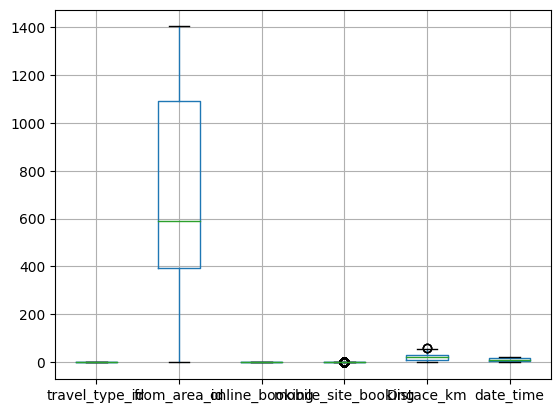

In [ ]:
# # visualization of data using boxplot
features_train2.boxplot()

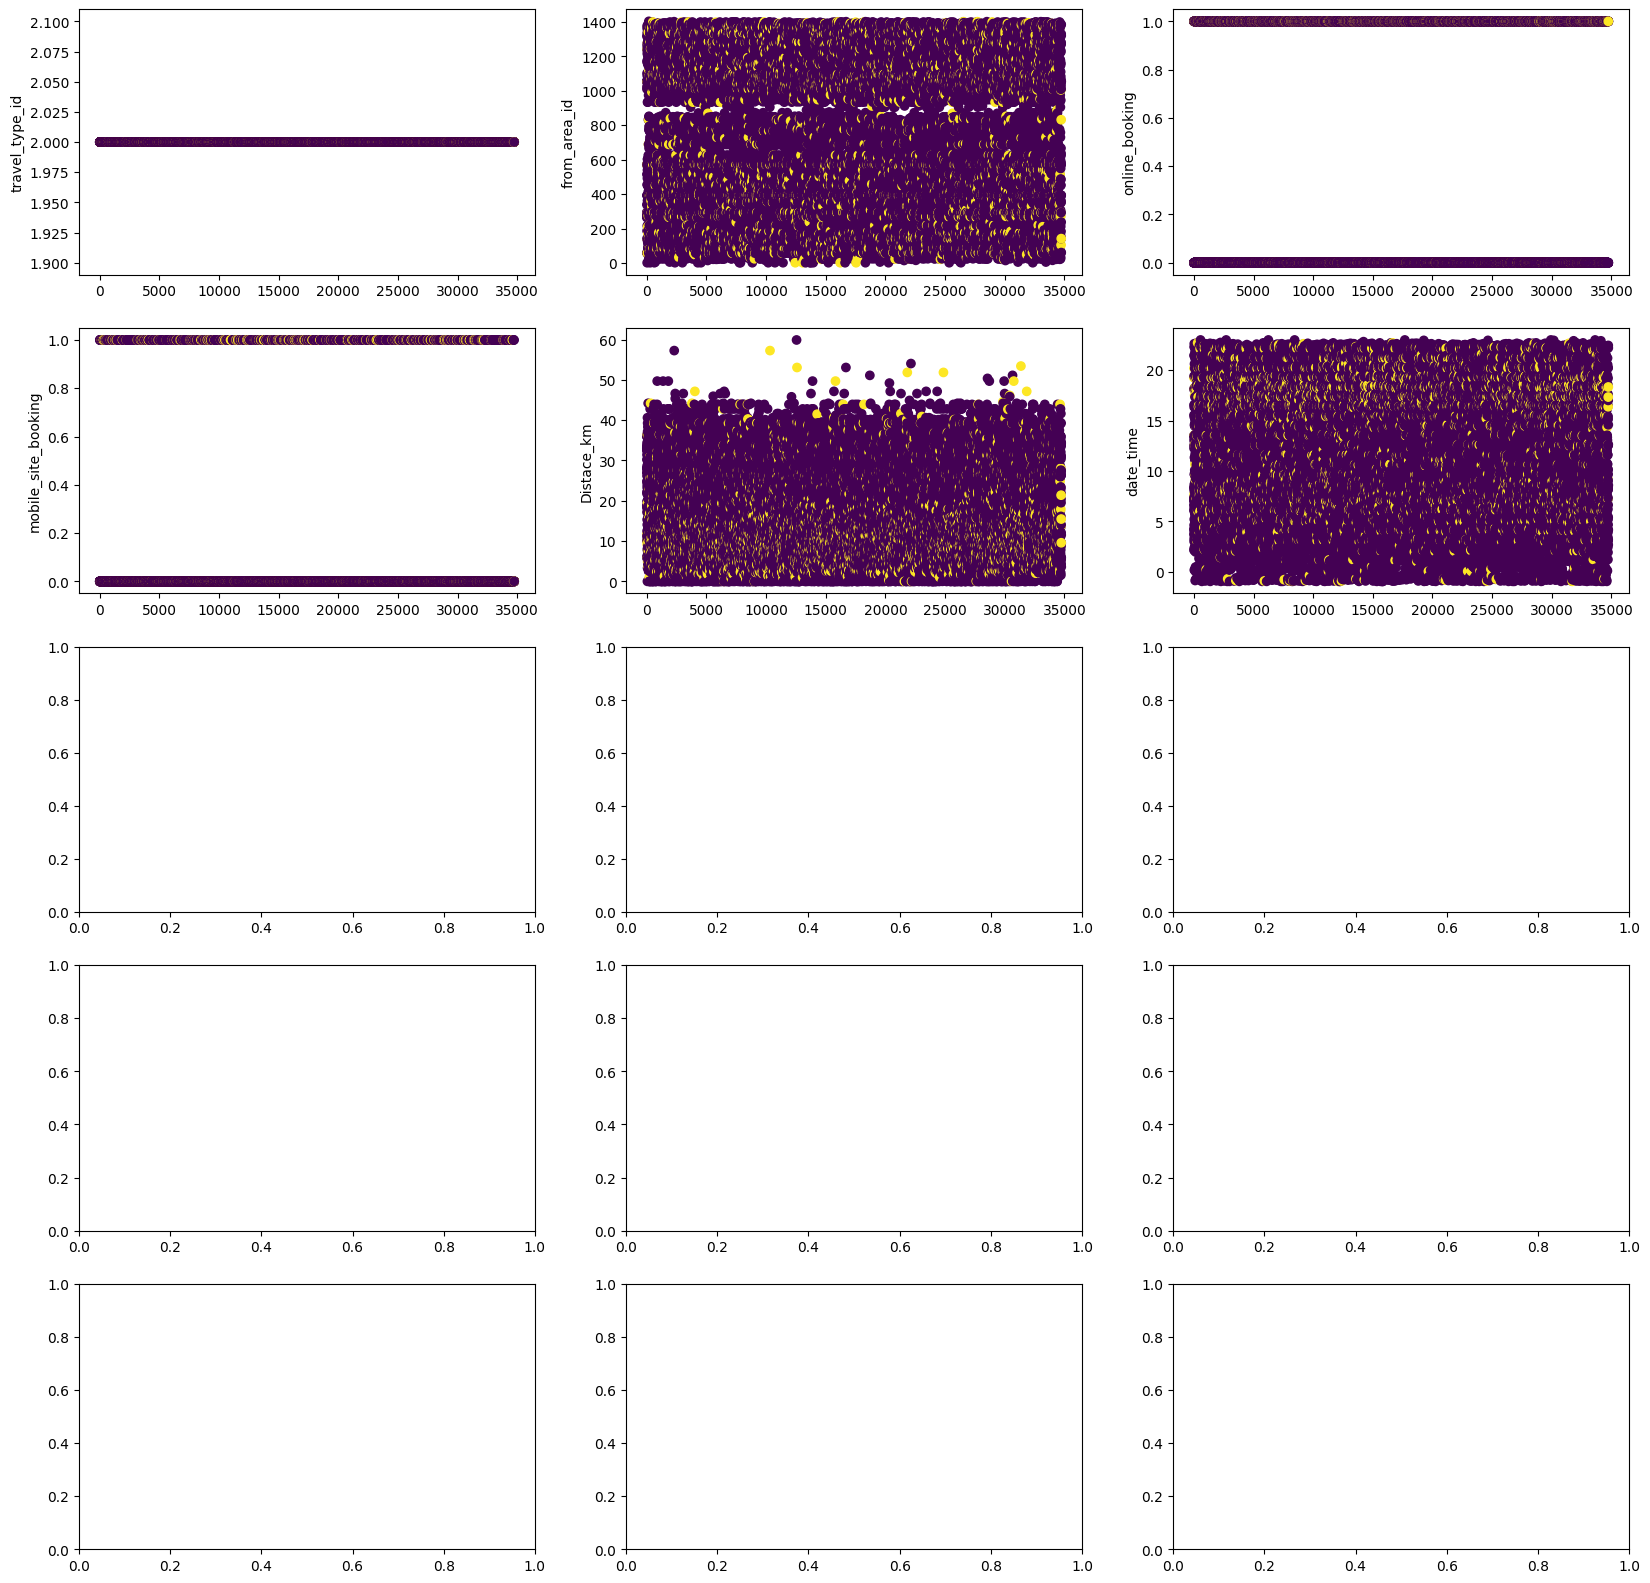

In [ ]:
# visualization of data using subplot
numeric_cols=features_train2.select_dtypes(include = np.number) ### selects numeric columns
column_names=list(numeric_cols.columns)
col_index=0
plot_rows=5
plot_cols=3

fig, ax =plt.subplots(nrows=plot_rows,ncols=plot_cols,figsize=(20,20))

for row_count in range(plot_rows):
  for col_count in range(plot_cols):
    if col_index < len(column_names):
      ax[row_count][col_count].scatter(y=numeric_cols[column_names[col_index]],x=numeric_cols.index,c=target_train2)
      ax[row_count][col_count].set_ylabel(column_names[col_index])
      col_index=col_index + 1
    else:

      break

plt.show()

In [ ]:
features_train2.isnull().sum()

travel_type_id         0
from_area_id           0
online_booking         0
mobile_site_booking    0
Distace_km             0
date_time              0
dtype: int64

In [ ]:
# % of null values
features_val2.isnull().sum()*100/features_val2.shape[0]

travel_type_id         0.0
from_area_id           0.0
online_booking         0.0
mobile_site_booking    0.0
Distace_km             0.0
date_time              0.0
dtype: float64

# feature  scaling

In [ ]:
# feature  scaling
standard_scaler=StandardScaler()
features_train2=standard_scaler.fit_transform(features_train2)
features_val2=standard_scaler.transform(features_val2)

# LogisticRegression

In [ ]:
# LogisticRegression
lr=LogisticRegression(max_iter=500,random_state=42,class_weight={0:1,1:4.5})
lr.fit(features_train2,target_train2)
#prediction for test data set
features_pred2=lr.predict(features_val2)
features_pred2

array([0, 1, 0, ..., 0, 0, 0])

# accuracy

In [ ]:
# accuracy
print("accuracy :",metrics.accuracy_score(target_val2,features_pred2))


accuracy : 0.8835040865661333


# classification_report

In [ ]:
# classification_report
print(classification_report(target_val2,features_pred2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8061
           1       0.26      0.34      0.29       626

    accuracy                           0.88      8687
   macro avg       0.60      0.63      0.62      8687
weighted avg       0.90      0.88      0.89      8687



#knn- KNeighborsClassifier

In [ ]:
#knn- KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25,weights="uniform",leaf_size=25,p=6,n_jobs=-1)
knn.fit(features_train2,target_train2)
#prediction for test data set
features_pred2=knn.predict(features_val2)
features_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy metrics
print("accuracy :",metrics.accuracy_score(target_val2,features_pred2))


accuracy : 0.9267871532174513


In [ ]:
## classification_report
print(classification_report(target_val2,features_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.29      0.01      0.02       626

    accuracy                           0.93      8687
   macro avg       0.61      0.50      0.49      8687
weighted avg       0.88      0.93      0.89      8687



# DecisionTreeClassifier

In [ ]:
# DecisionTreeClassifier
dt=tree.DecisionTreeClassifier(random_state=42,max_depth=6,criterion="entropy",min_samples_split=8,min_samples_leaf=3)
dt.fit(features_train2,target_train2)
#prediction for test data set
features_pred2=dt.predict(features_val2)
features_pred2


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy
from sklearn import metrics
print("accuracy :",metrics.accuracy_score(target_val2,features_pred2))

accuracy : 0.92621158052262


In [ ]:
# classification_report
print(classification_report(target_val2,features_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.29      0.02      0.03       626

    accuracy                           0.93      8687
   macro avg       0.61      0.51      0.50      8687
weighted avg       0.88      0.93      0.89      8687



# RandomForestClassifier

In [ ]:
# RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400,random_state=42,max_depth=9,max_features="sqrt",criterion="entropy")
rf.fit(features_train2,target_train2)
features_pred2=rf.predict(features_val2)
print("accuracy score:")
print(metrics.accuracy_score(target_val2,features_pred2))

accuracy score:
0.9281685276850467


In [ ]:
# classification_report
print(classification_report(target_val2,features_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.62      0.01      0.02       626

    accuracy                           0.93      8687
   macro avg       0.78      0.50      0.49      8687
weighted avg       0.91      0.93      0.89      8687



# SVM

In [ ]:
## SVC
svc=SVC()
svc.fit(features_train2,target_train2)
features_pred2=svc.predict(features_val2)
print("accuracy score:")
print(metrics.accuracy_score(target_val2,features_pred2))

accuracy score:
0.9279382986071141


In [ ]:
## classification_report
print(classification_report(target_val2,features_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8061
           1       0.00      0.00      0.00       626

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687



### The Goal Of the competition is to create a predictive model for classifying new bookings as to whether they will eventually gets cancelled due to car unavailability company does not have to pay a penality to the customer.